In [ ]:
# "L'Ensemble Learning" consiste à entraîner plusieurs modèles de ML pour ensuite considérer l'ensemble de leurs prédictions

## Il existe pour ca Trois Grandes Methodes : 
    ## 1 _ Le Bagging
    ## 2 _ Le Boosting 
    ## 3 _ Le Stacking
    

# Ensemble Learning ~ Wisdow of the Crowd

In [ ]:
# Plusieurs modèles ne feront pas les mêmes erreurs au mêmes endroits

## Donc si on venait à combiner les résultats de nos différents modèles pour garder à chaque fois la prédiction majoritaire, on 
## on augmenterait leur efficacité 
    ## Wisdom of the Crowd : Une foule d'ignare a plus souvent raison qu'un individu expert
    
### Cela est notamment dût à la loi des grands_nombres
    ### Càd que plus le nombre d'individus dans la foule augmente plus la performance de la majorité s'approche des 100% 
    

In [ ]:
# Il faut néanmoins que notre modèle respecte deux grands critères 

## 1 _ Il faut que les modèles, les membres de la foule, aient au moins 50% de performance, sinon on tendra vers 0% d'efficacité

## 2 _ Il faut que la foule présente un minimum de diversité 
    ## Si ils partagent tous la même opinion, cela n'a aucun intérêt
        ## De tel sorte que la faiblesse des uns soit compensé par la force des autres
    

In [ ]:
# En ML, on va utiliser ce concept pour créer des 'ensembles de modèles' qui surpasse les performance des meilleurs modèles

## Tout ce ce qu'il faut est satisfaire ces différents critères :
    # 1 - Taille
    # 2 - Compétence 
    # 3 - Diversité

### Et il existe pour ca Trois Grandes Methodes : 
    ### 1 _ Le Bagging
    ### 2 _ Le Boosting 
    ### 3 _ Le Stacking
    

# 1 _ Le bagging 

In [ ]:
# L'idée est de créer plusieurs entités d'un même modèle
    # Par exemple plusieurs arbres de décisions

## Puis d'entraîner chaque copie sur une partie/portion aléatoire du dataset
    ## Pour cela on utilise une technique d'échantillonage, le 'Bootstrapping'
    

## Le Boostrapping

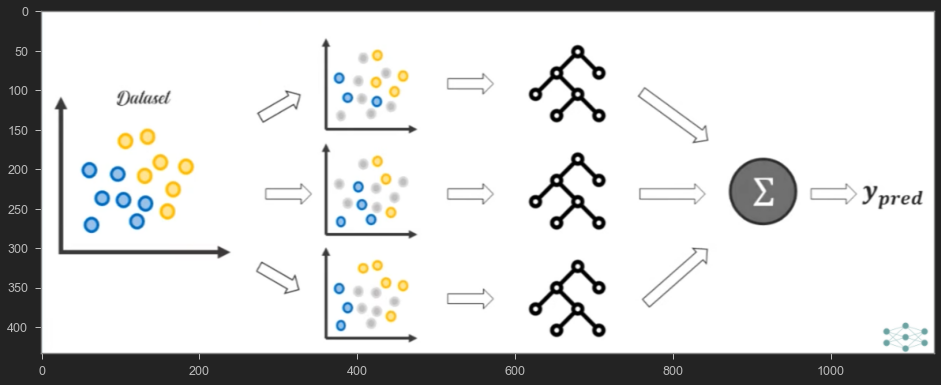

In [1]:
# Le 'Boostrapping' consiste à replacer, après chaque tirage au sort, les données qui ont été selectionnées

## De cette manière on obtient une foule de modèles diversifiée, puisqu'ils n'ont pas tous été 'nourrit' avec les même données, mais
## qui partagent quand même des connaissances en commun
    ## Ce qui est très important pour obtenir des majorités en faveur des 'bonne réponses'
    
### Une fois qu'on a cette foule on peut donc regrouper les résultats de chaque modèle pour faire notre préduction, y

image = plt.imread('Bagging.png')
plt.figure(figsize=(16,13))
plt.imshow(image)

In [ ]:
# Le principal exemple de Bagging est le Random_Forest

## C'est une forme de bagging dans lequel on choisit au départ un modèle de type 'Arbre_De_Décision'
    ## Puis on créer simplement un ensemble d'arbres sur la base de données tirées de façon aléatoire
        ## On obtient donc un Forêt Aléatoire, ie une Random_Forest
        

# 2 _ Le Boosting 

In [ ]:
# Une autre méthode d'obtenir des ensemble de modèles diversifiés est le Boosting

## L'idée est d'entraîner l'un après l'autre plusieurs modèles relativement faibles en demandant à chaque modèle d'essayer de 
## corriger les erreurs effectuées par son prédecesseur

### On obtient alors un ensemble de modèles parfaitement complémentaires où les faiblesses des uns sont contre_balancées par les 
### forces des autres 

#### Pour faire ça il existe deux grands algorithmes :
    ### 1 _ AdaBoost
    ### 2 _ Gradient_Boosting


#### Remarque 

In [ ]:
# On voit que dans le 'Bagging', on entraîne nos modèles en PARALLELE
    # Chacun de nos modèles est relativement 'performant' et en situation "d'Overfitting"
        # Les réunir permet donc de réduire la VARIANCE de la foule

## Là où pour le 'Bossting', on entraîne nos modèles en SERIE
    # A l'inverse, ici chacun de nos modèle est relativement 'faible' et en situation "d'Underfitting"
        # Mais en les construisant les uns par dessus les autres on est capable de réduire le BIAIS de la foule

## Même si elles emploient des méthodes différentes, ces deux tecniques permettent d'obtenir des résultats équivalents,
    ## Càd un ensemble de modèle qui soit Compétents, Grands & Diversifiés
    

# 3 _ Le Stacking

In [ ]:
# L'idée est d'entraîner un modèle de ML par_dessus les prédictions de notre foule 

## Càd que, au lieu de simplement réunir les résultat de nos modèles pour retenir une prédiction majoritaire,
    ## On demande à un modèle de reconnaître qui a tort et qui a raison pour lui même prédire le résultat final

# Application avec SKlearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

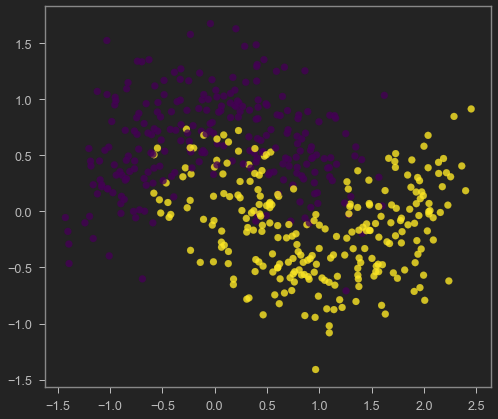

In [3]:
# On génère nos données 
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)



In [6]:
# On commence TOUJOURS par créer nos Train & Test _ Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 1 _ Voting Classifier 

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [7]:
# Pour l'utiliser il faut commencer par définir quels vont être les modèles qui vont le composer
    # Les modles de notre 'foule'

# On définit nos modèles et on commence, par curiosité, par voir leur efficacité si utilisé de façons distincte 

model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

for model in (model_1, model_2, model_3):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

# On obtient en moyenne 0.85-0.86 de précision 

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86


In [8]:
# Pour utiliser le Voting Classifier, il suffit de créer une liste composée de nos différents modèles

## A noter que l'on créer des tuples dans cette liste car il faut donner un nom à ce modèle puis indiquer duquel il s'agit

### La dernière chose très importante à spécifier est la technique de 'vote' qui va être utilisé 

    ### Il existe Deux Types de Votes 
    
        ### 1 _ 'Hard Voting' : Vote basé sur les prédictions
            ### Consite à prendre la prédiction majoritaire (donc indépendament du 'poids' asociés à chaque vote)
            
        ### 2 _ 'Soft Voting' : Vote basé sur la probabilité de chaque classe
            ### On va accumuler les probabilités du chaque classe
                ### Donc permet de prendre en compte des avis extrême (Peut-être une bonne comme une mauvaise chose/idée)
                
    ### En général on dit que le vote 'Soft' est un peu meilleur si nos modèles sont bien qualibrés, donc il vaut mieux l'utiliser

model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_4 = VotingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))
    


SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


In [ ]:
# Cela a bien permis d'augmenter l'efficacité de notre modèle

## Ce n'est néanmoins pas une technique d'ensemble très efficace
    ## Car il est très difficile avec cette technique de respecter le 3ème critères, càd le critère de Diversité
        ## Ici en effet ils nous disent tous à peu près la même chose 
        
            ## Le meilleur moyen de gagner de la diversité c'est grâce au Bagging et au Boosting

### Voting_Regressor

In [ ]:
# Cette technique s'utilise dans le cas de variable continue 

## Comme son nom ne l'indique PAS, il repose en faite sur la moyenne 
    ## La prédiction finale correspond à la moyenne des prédictions 

# 2 _ Le Bagging

In [9]:
# On voit son application pour les deux modèles suivant mais peut-être appliqué à tous les autres modèles de Bagging (Regression)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


### BaggingClassifier

In [12]:
# On va par exemple utilsier un BaggingClassifier
    # Pour l'utliser, il suffit de définir l' estimateur avec lequel on souhaite travailler
        # Un KNeibhorsClassifier 
        # Un arbre de décision
        # Un SGD Classifer 
        # etc..
    
    ## Il y a ensuite un autre argument très important à spécifier, le nombre d'estimator
    
    ### Il n'y a que ça à retenir quand on fait du bagging 

model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=100)



BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100)

In [13]:
# Il nous reste alors plus qu'a entraîner notre modèle 
model.fit(X_train, y_train)

## Puis de le tester
model.score(X_test, y_test)

### On obtient alors une efficacité de 0,885%, soit plus que pour le Voting_Classifier
    ### Car on arrive à créer de la diversité 

0.8866666666666667

 ### RandomForest

In [14]:
# L'utilisation d'un RandomForest est encore plus simple 

## On a alors seulement à préciser ne nombre d'estimateurs que l'on souhaite

### Il n'est pas utile de spécifier le 'base_estimator' car le RandomForest utilise par définition un Arbre_De_Décision

model = RandomForestClassifier(n_estimators=100)

In [15]:
# Il nous reste alors plus qu'a entraîner notre modèle 
model.fit(X_train, y_train)

## Puis de le tester
model.score(X_test, y_test)

0.88

In [ ]:
# Il existe néanmoins avec cet estimateur des hyperparamètres déjà plus intéressant à utiliser :
    # max_depth : quelle est la taille maximum des arbres que l'on veut avoir 
        # Plus cette taille est grande, plus nos arbres seront des 'expert dans leur domaine' 
        # Mais ils seront alors plus propice à faire de l'Overfitting 
        # Il faudra alors agrandir la taille de notre forêt (n_estimator)
            # Mais alors plus notre modèle sera lent
            

# 3 _ Le Boosting 

In [16]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Il existe donc deux grand algorithmes de Boosting : 
    # AdaBosst
    # GradientBoosting
    
## Qui, encore une fois, sont valables en tant que Classifier & en tant que Regresseurs

### AdaBoostClassifier

In [17]:
# Le principe est toujours le même, de base ce sont encore des Arbres_De_Décisions qui sont utilisés

model = AdaBoostClassifier(n_estimators=100)

# Il nous reste alors plus qu'a entraîner notre modèle 
model.fit(X_train, y_train)

## Puis de le tester
model.score(X_test, y_test)

0.88

# 4 _ Le Stacking

In [18]:
from sklearn.ensemble import StackingClassifier

# Comme on l'a vu avec le Voting_Classifier, le but en d'entraîner un estimateur, par dessus les prédictions de différents modèles


In [23]:
# On va alors simplement reprendre notre liste précédente mais cette fois pour un Stacking_Classifier

## Et, à la place d'avoir un 'voting', on va avoir un 'final_estimator'
    ## Càd celui qui va effectuer son estimation 'par-dessus' notre 'foule', 
        ## Ici, par exemple, un KNeighborsClassifier

model_4 = StackingClassifier([('SGD', model_1),
                               ('Tree', model_2),
                               ('KNN', model_3)],
                              final_estimator=KNeighborsClassifier())

# Il nous reste alors plus qu'a entraîner notre modèle 
model_4.fit(X_train, y_train)

## Puis de le tester
model_4.score(X_test, y_test)

0.8666666666666667

# Quand utiliser Quoi ? 

In [ ]:
# On utilisera plutôt le 'Bagging' lorsque l'on se rend compte que nos modèles univariés ont tendances à faire de l'Overfitting
    # Dans ce cas, le fait de créer plusieurs experts et d'en faire la moyenne, ou bien du 'vote', via la BootStrapping va réduire
    # cet Overfitting
    
## Si, à l'inverse, on travail avec des modèles individuels ayant du mal à obtenir une bonne performance simplement sur le Train_Set
    ## On s'orientera alors plutôt vers le Boosting
    
### Enfin, le Stacking est une technique à utiliser lorsque l'on à énormément entraîner nos modèles, càd avec de nb itérations
    ### C'est puissant mais putain c'est lent 